    Jacob Knopping
    2/25/2020

    26.2 Assignment

#### Iris dataset

#### 1) Your task is to apply k-means to the iris dataset and see what happens when you change the value of k. Which solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor. Keep in mind that it's possible you may find a solution with more than 3 clusters that nevertheless better tracks the real, trinary outcome – two of those clusters may map to a single flower type while the other two map to the other types for example.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
#Load the data from Sklearn
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Standardize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [7]:
#Define k-means
cluster_numbers = [2, 3, 4, 5, 6]
kmeans_clusters = []

for i in cluster_numbers:
    k_means = KMeans(n_clusters=i, random_state=123)
    kmeans_clusters.append(k_means.fit_predict(X_std))

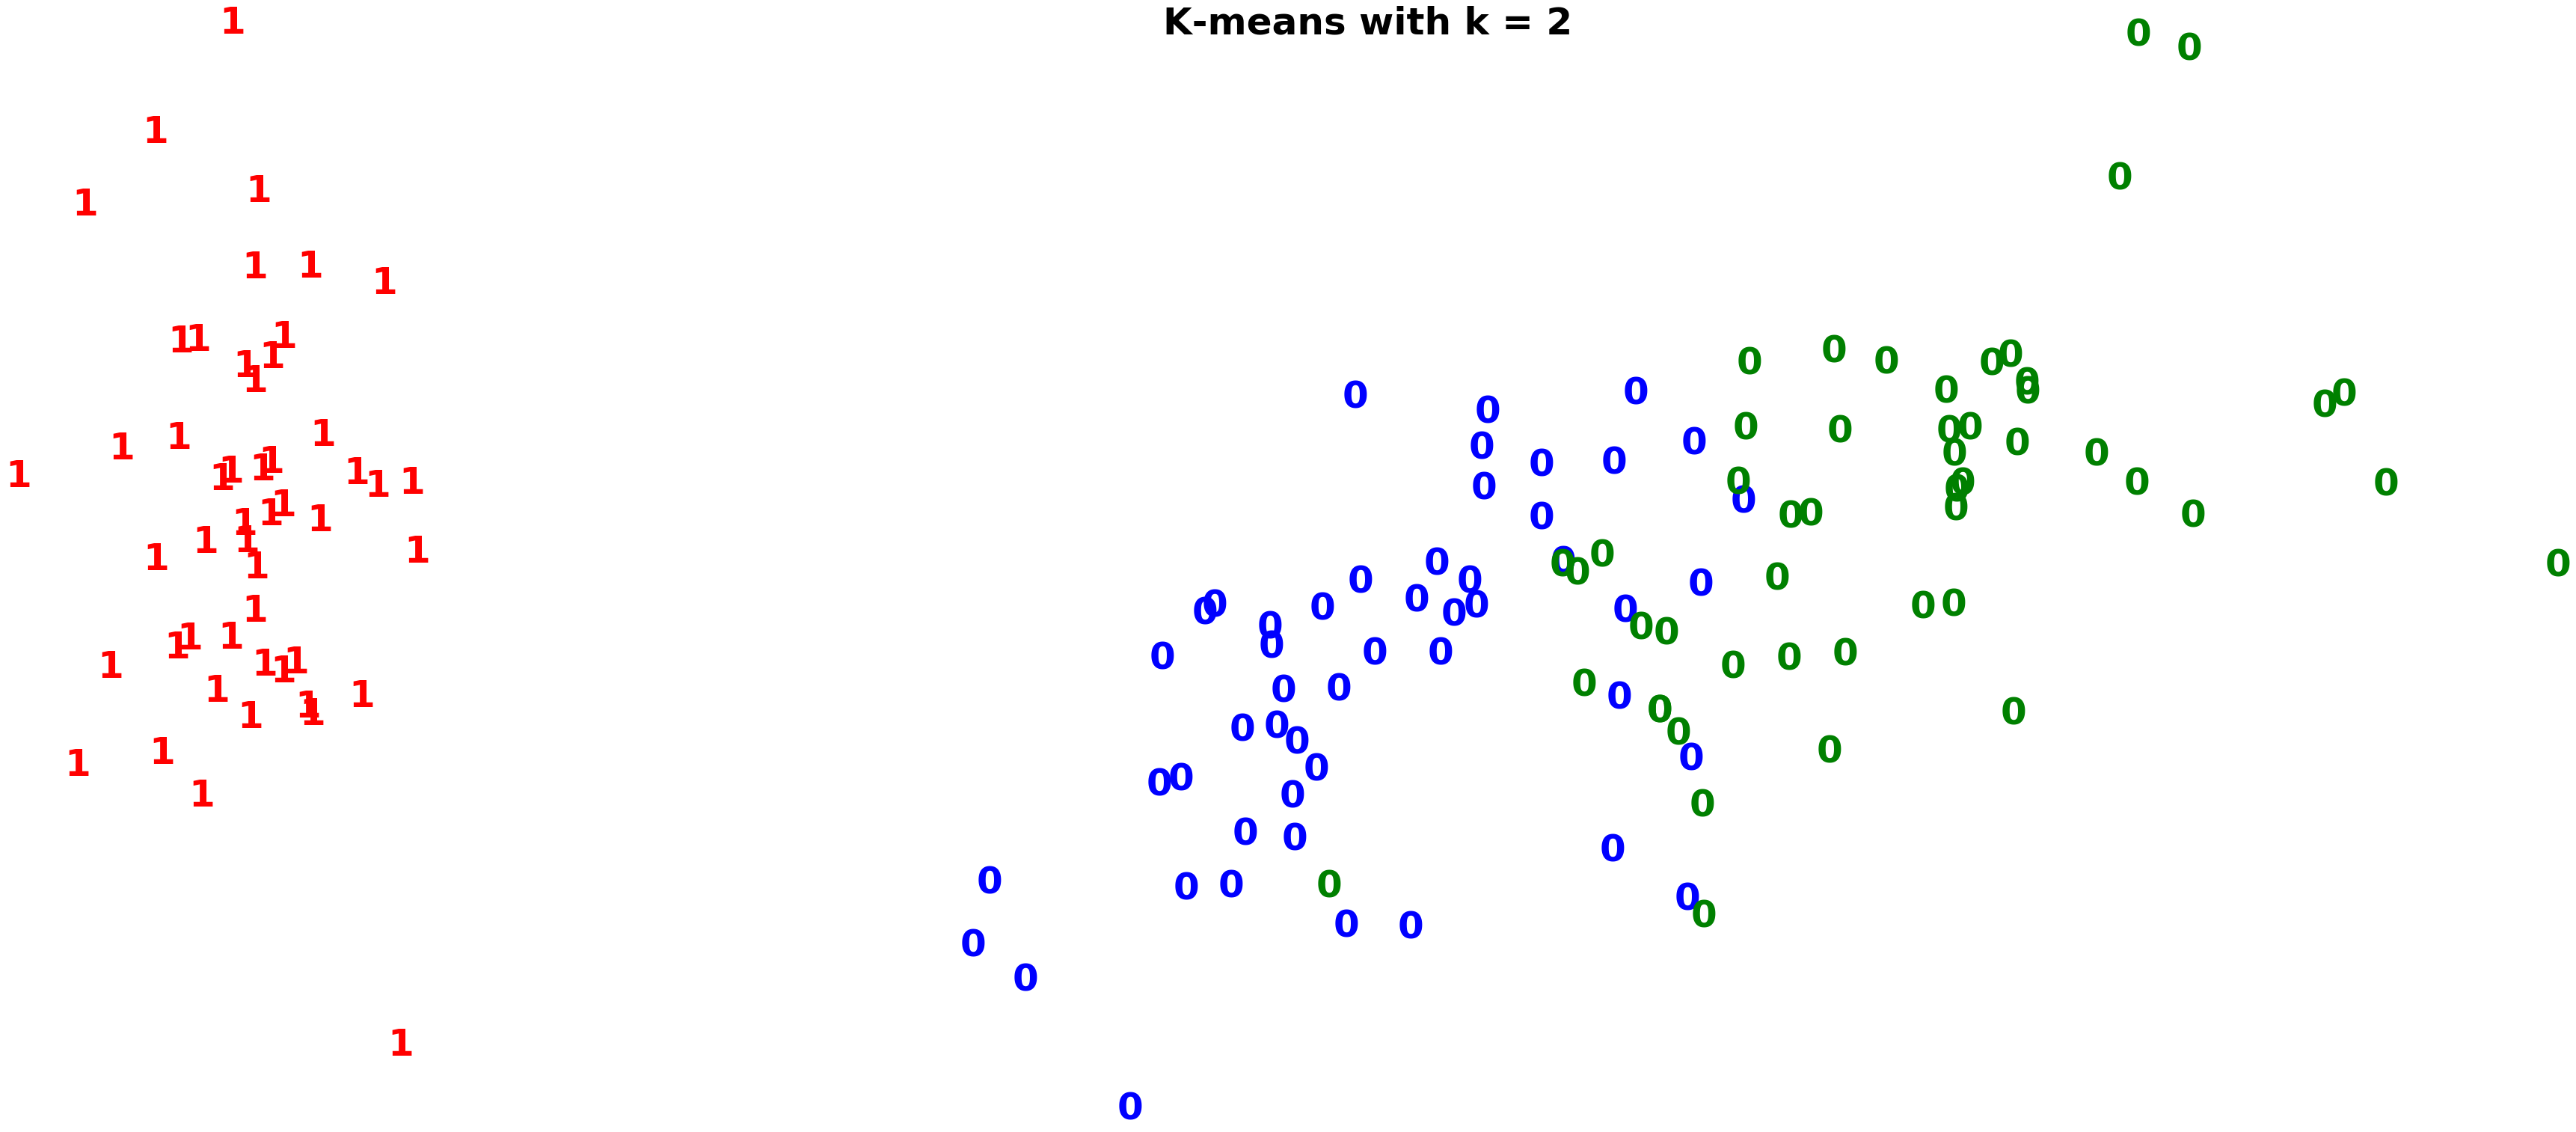

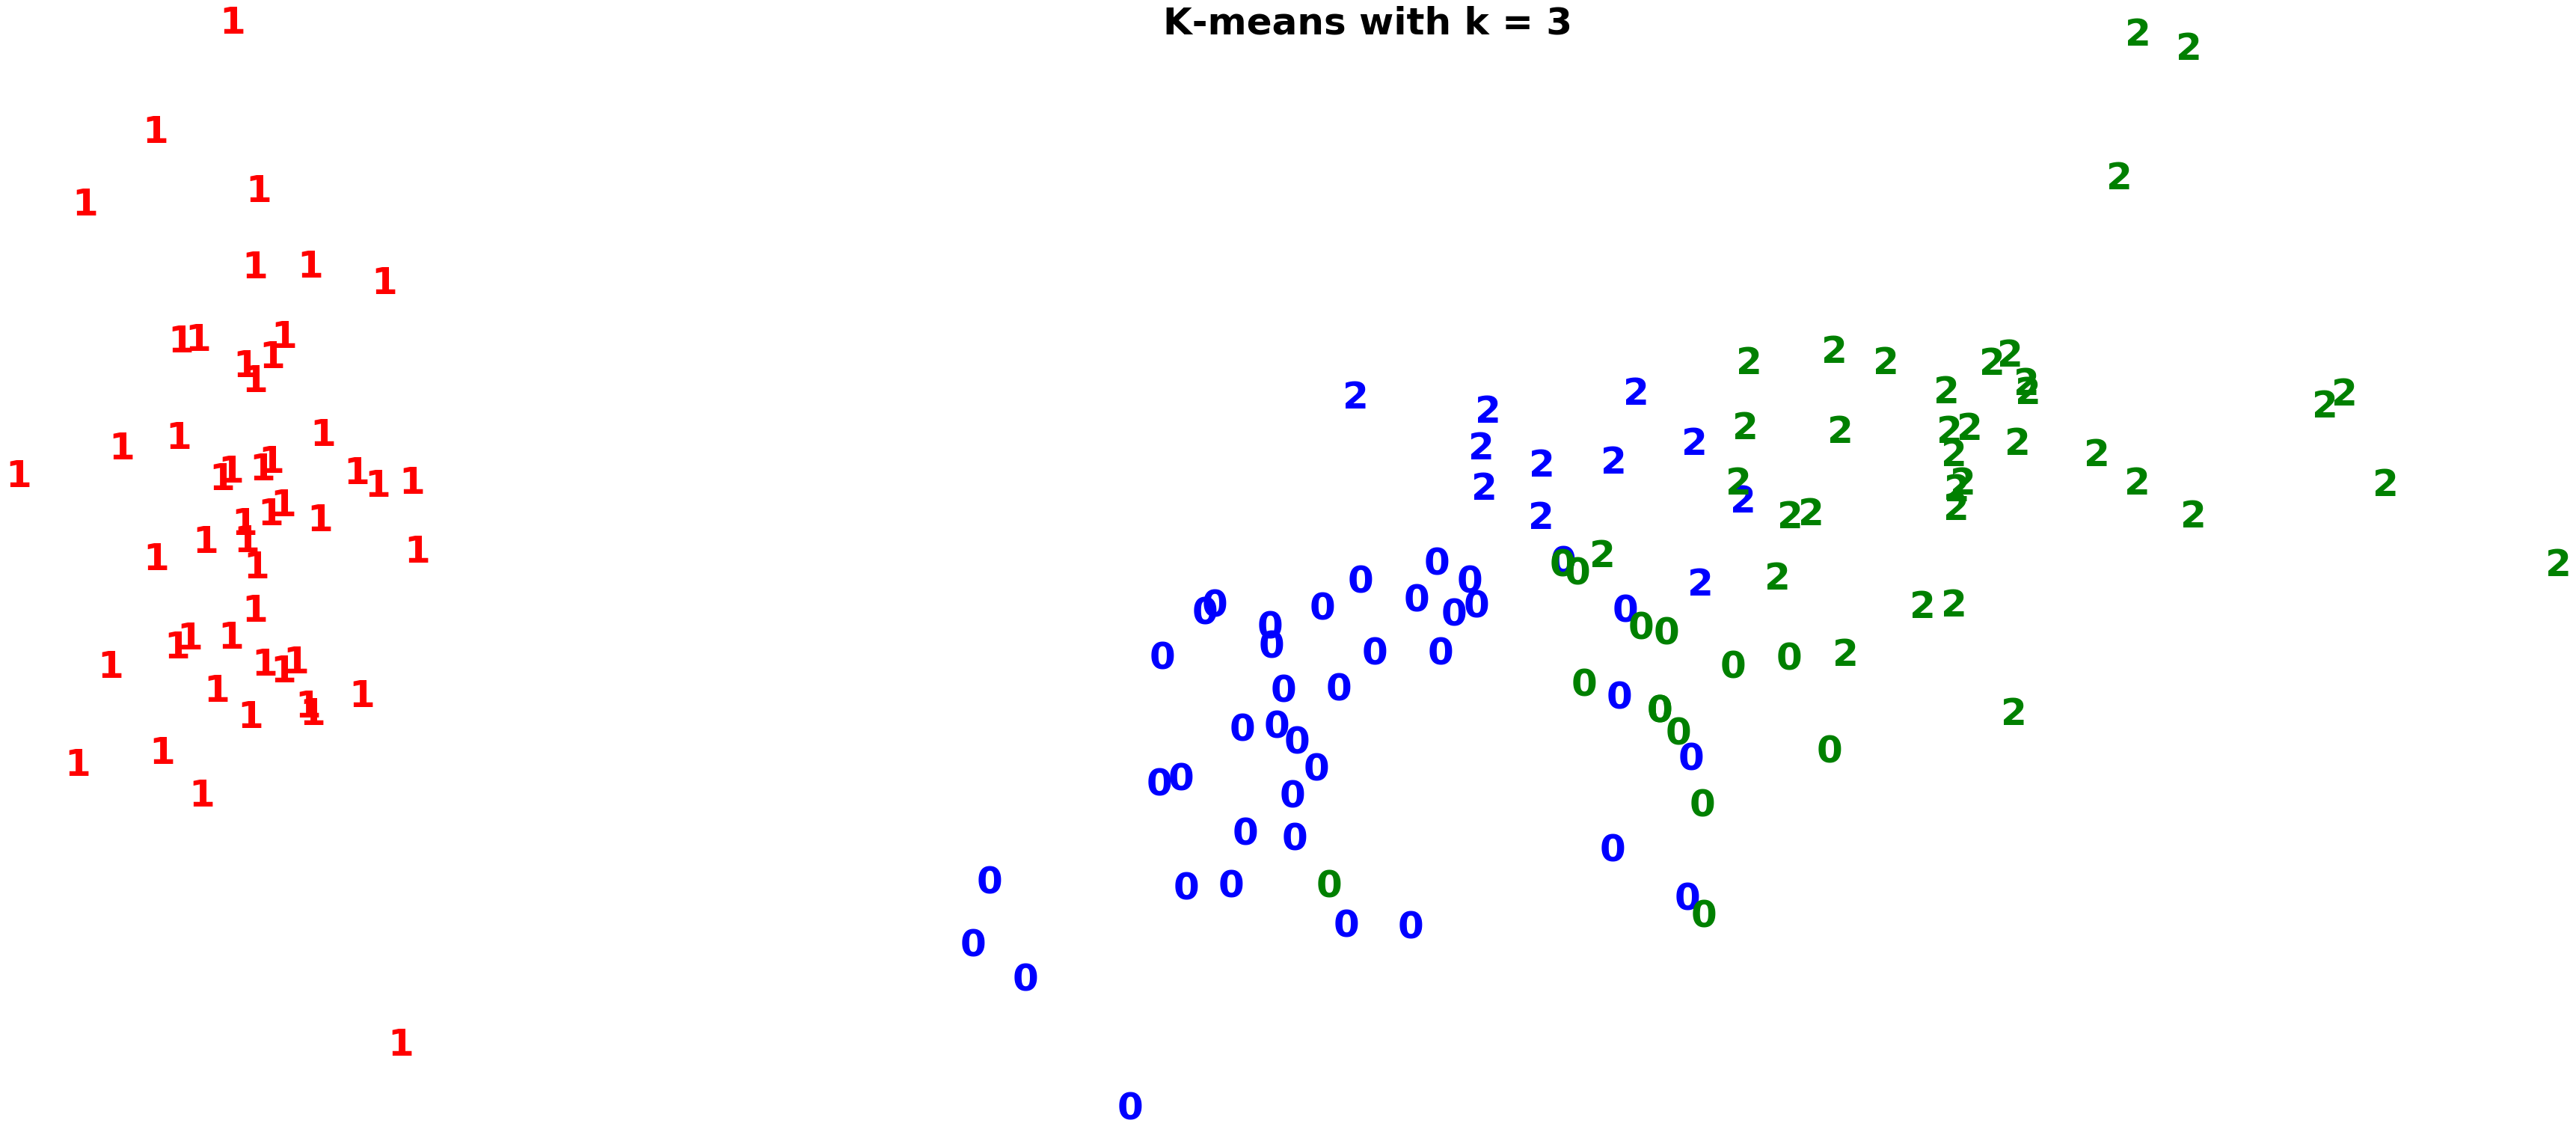

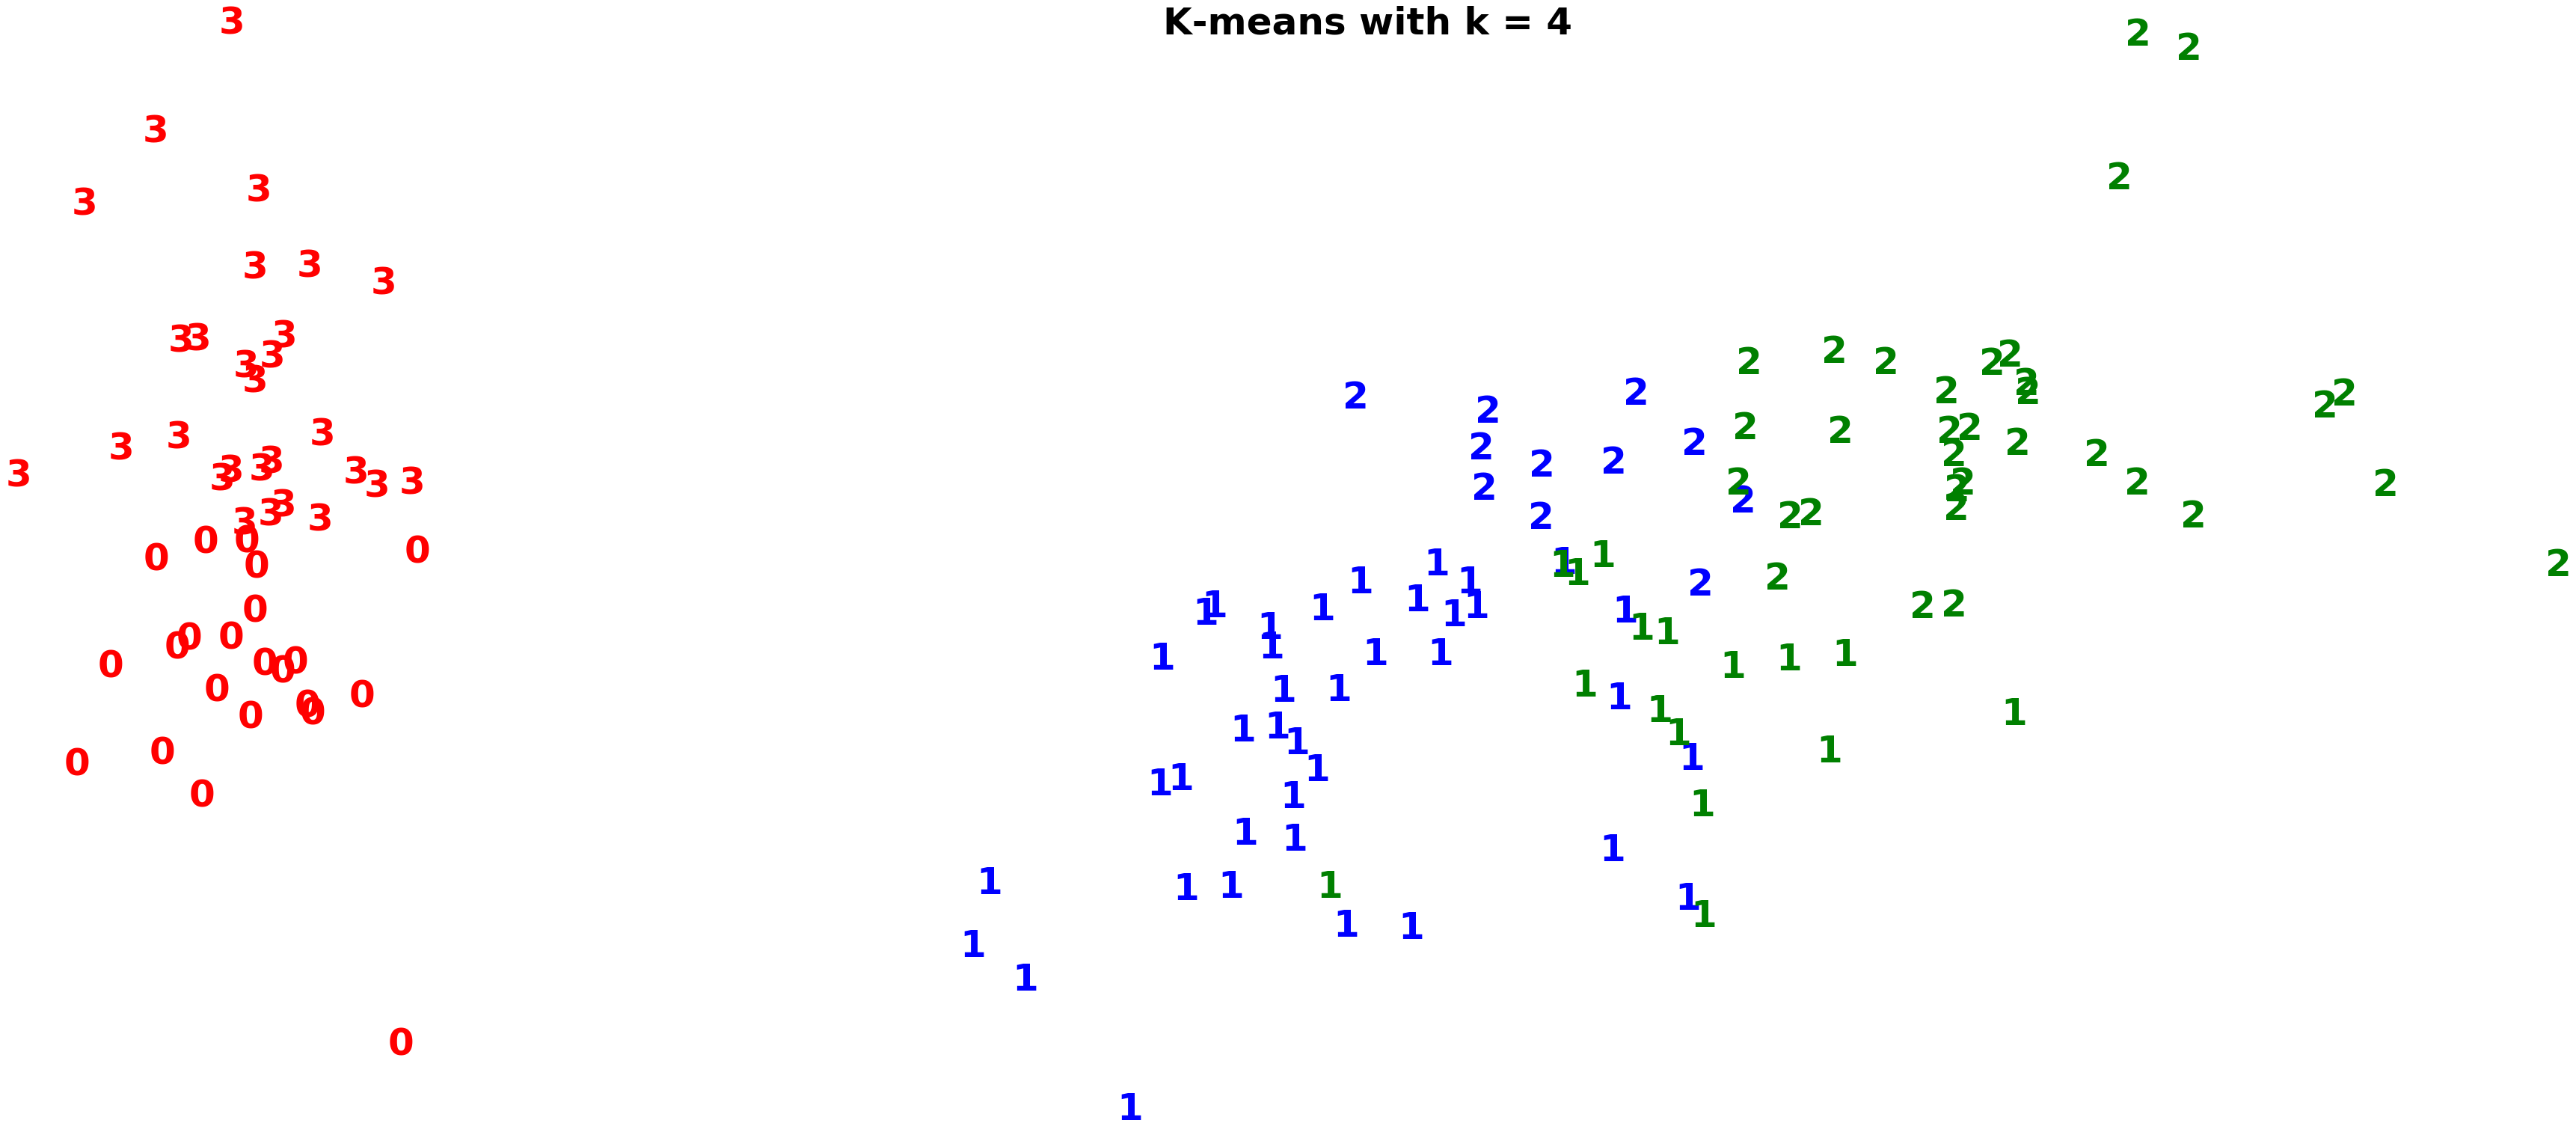

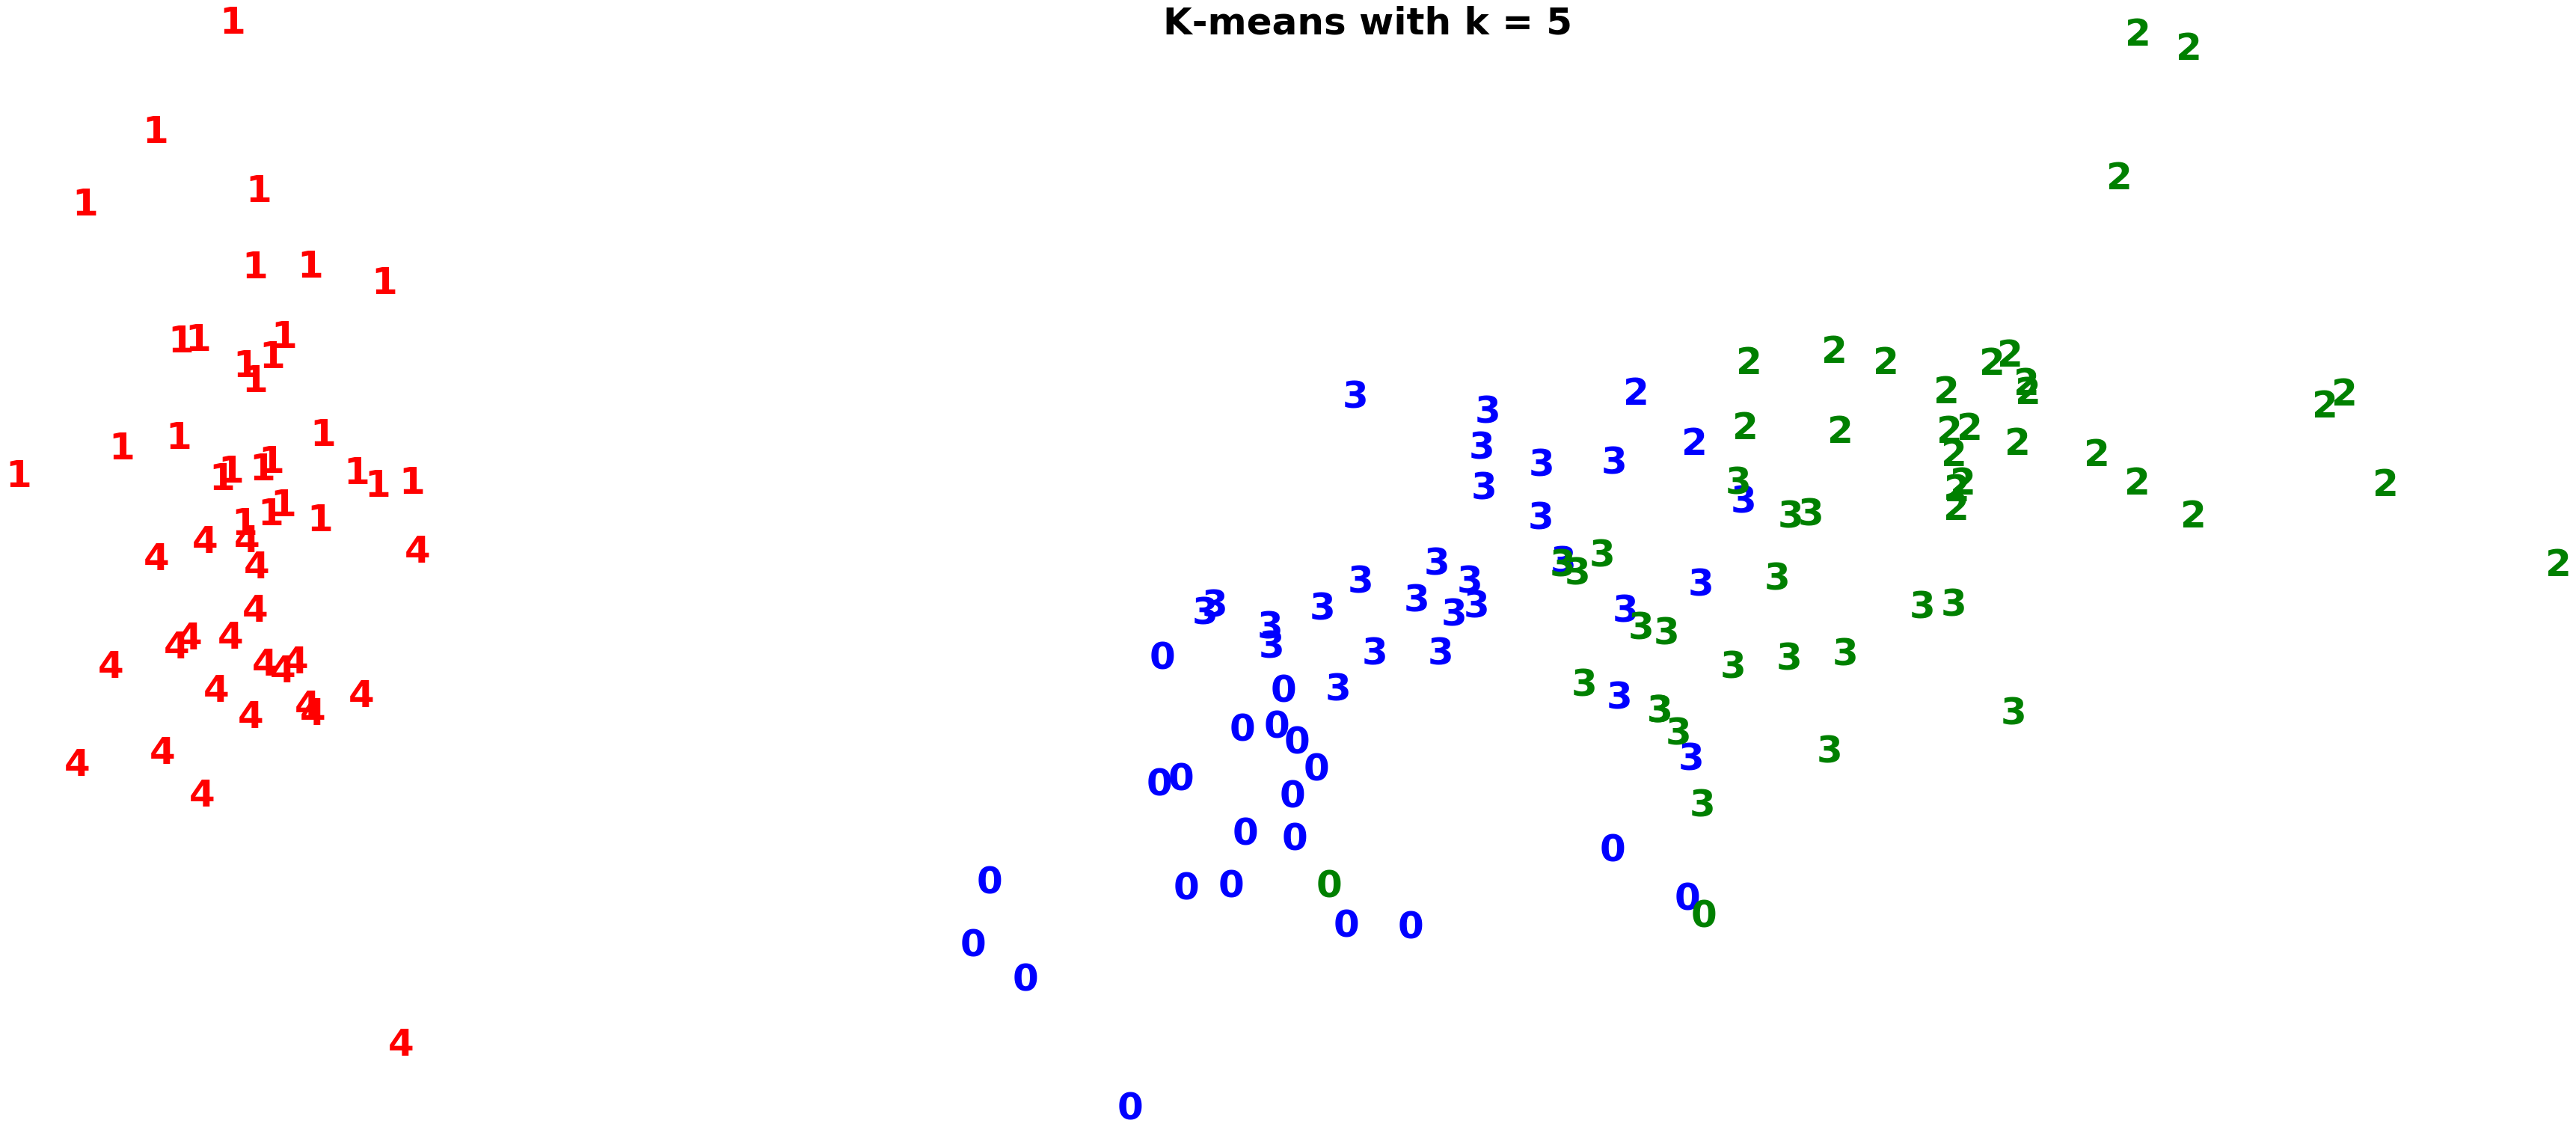

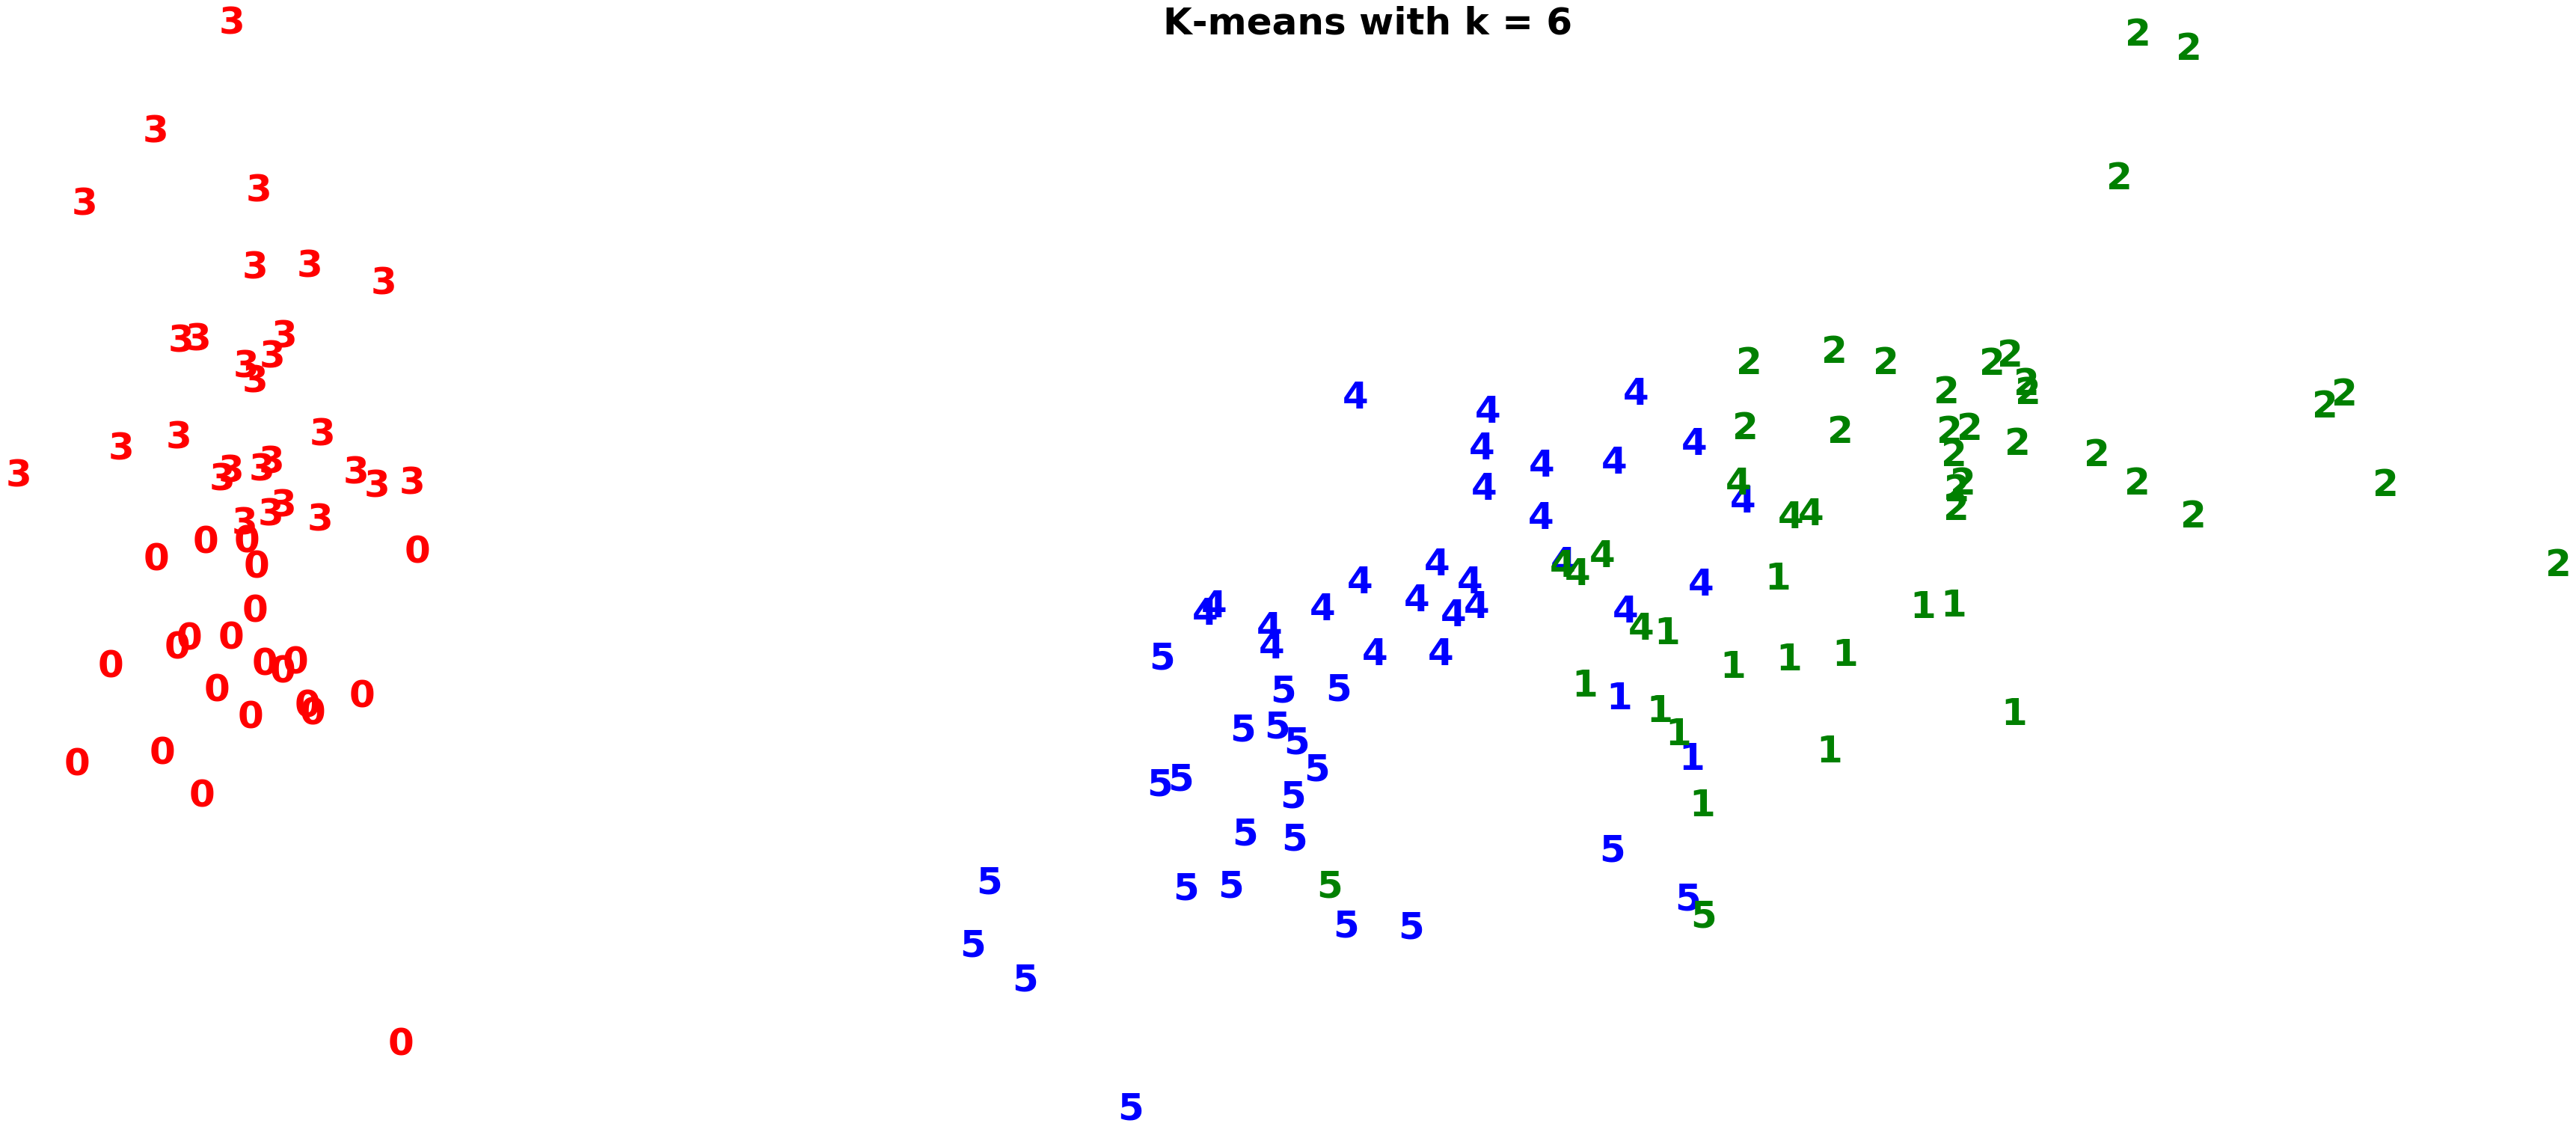

In [8]:
#Visualize using PCA

pca = PCA(n_components=2).fit_transform(X_std)

colours = 'rbg'
for i, solution in enumerate(kmeans_clusters):
    plt.figure(figsize=(10,5))
    plt.text(np.mean(pca[:,0]), np.max(pca[:, 1]), "K-means with k = {}".format(cluster_numbers[i]),
                 fontdict={'weight': 'bold', 'size': 50})
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(solution[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

The only solutions where the clusters produce viable results are the ones with k=2 and k=3. However, k=2 only produces two clusters, and there is no distinction between the 2nd and 3rd class (1 is a linearly seperable class, 2 and 3 are not). As suspected, k=3 is the right choice. The linearly non-seperable class (2 and 3) is mostly correctly assigned.

#### Heart disease dataset from UC Irvine

#### 2) Create a k-means solution that correctly assigns patients to "heart disease diagnosis" or "no heart disease diagnosis" clusters. Note that in this case, we actually know the correct number of clusters in the data which is two. But, you'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will be blind to whether or not patients have heart disease.

In [35]:
#Import heart disease dataset
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [20]:
heartdisease_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [36]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

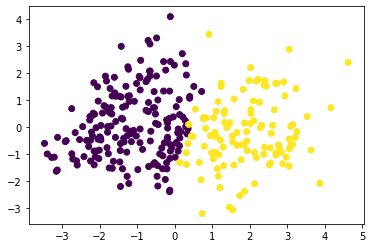

In [38]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Reduce it to two components for visualization
X_pca = PCA(2).fit_transform(X_std)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

Clusters visually look viable.

In [39]:
# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

Comparing k-means clusters against the data:
col_0    0    1
row_0          
0       38  151
1      101   13


There are only 51 errors out of 252 cases, meaning the model is performing decently.